In [1]:
import data_processing
import torch
from torch import nn
import MLP

In [2]:
file_names = ['circle', 'comeHere', 'goAway', 'wave']
label = file_names
data_list = []
image_list = []
label_list = []
data_list = data_processing.read_csv(file_names)
data_processing.data_preprocessing(data_list)
# data_list = data_processing.filter_data(data_list)
data_list = data_processing.normalization(data_list)
image_list, label_list = data_processing.data_transfer_list(data_list, label)
X, y = torch.tensor(image_list), torch.tensor(label_list)

In [3]:
num_input = 720
num_h1 = 256
num_h2 = 128
num_h3 = 64
num_output = 4
batch_size = 64
lr = 0.001
num_epochs = 800
weight_decay = 0.001

In [4]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(num_input, num_h1),
                    nn.ReLU(),
#                      nn.Linear(num_h2, num_h3),
#                      nn.ReLU(),
#                     nn.Linear(num_h1, num_h3),
#                     nn.ReLU(),
                    nn.Linear(num_h1, num_output))
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

In [5]:
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr, weight_decay=weight_decay)

In [6]:
train_iter, test_iter = MLP.load_array((X, y), batch_size)

epoch: 800
test_acc 0.9336734693877551
train_loss 0.3178895034400287
train_acc 0.9425287356321839


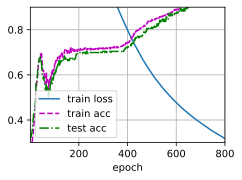

In [7]:
MLP.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

In [14]:
torch.save(net, 'model/net_parameters.pth')